# **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/water-quality-and-potability/water_potability.csv")

# **Understand And Organize the Dataset**

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

***There are too many null values, rather than removing them, it would be more logical to add their medians instead of the null values ​​for this data set.***

In [5]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(3276, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.describe().T

count          mean          std         min           25%  \
ph               3276.0      7.074194     1.470040    0.000000      6.277673   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          3276.0    333.608364    36.143851  129.000000    317.094638   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3276.0     66.407478    15.769958    0.738000     56.647656   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      7.870050     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    350.385756    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     76.666609    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

# **EDA (Exploratory Data Analysis)**

## **Pairplots** 

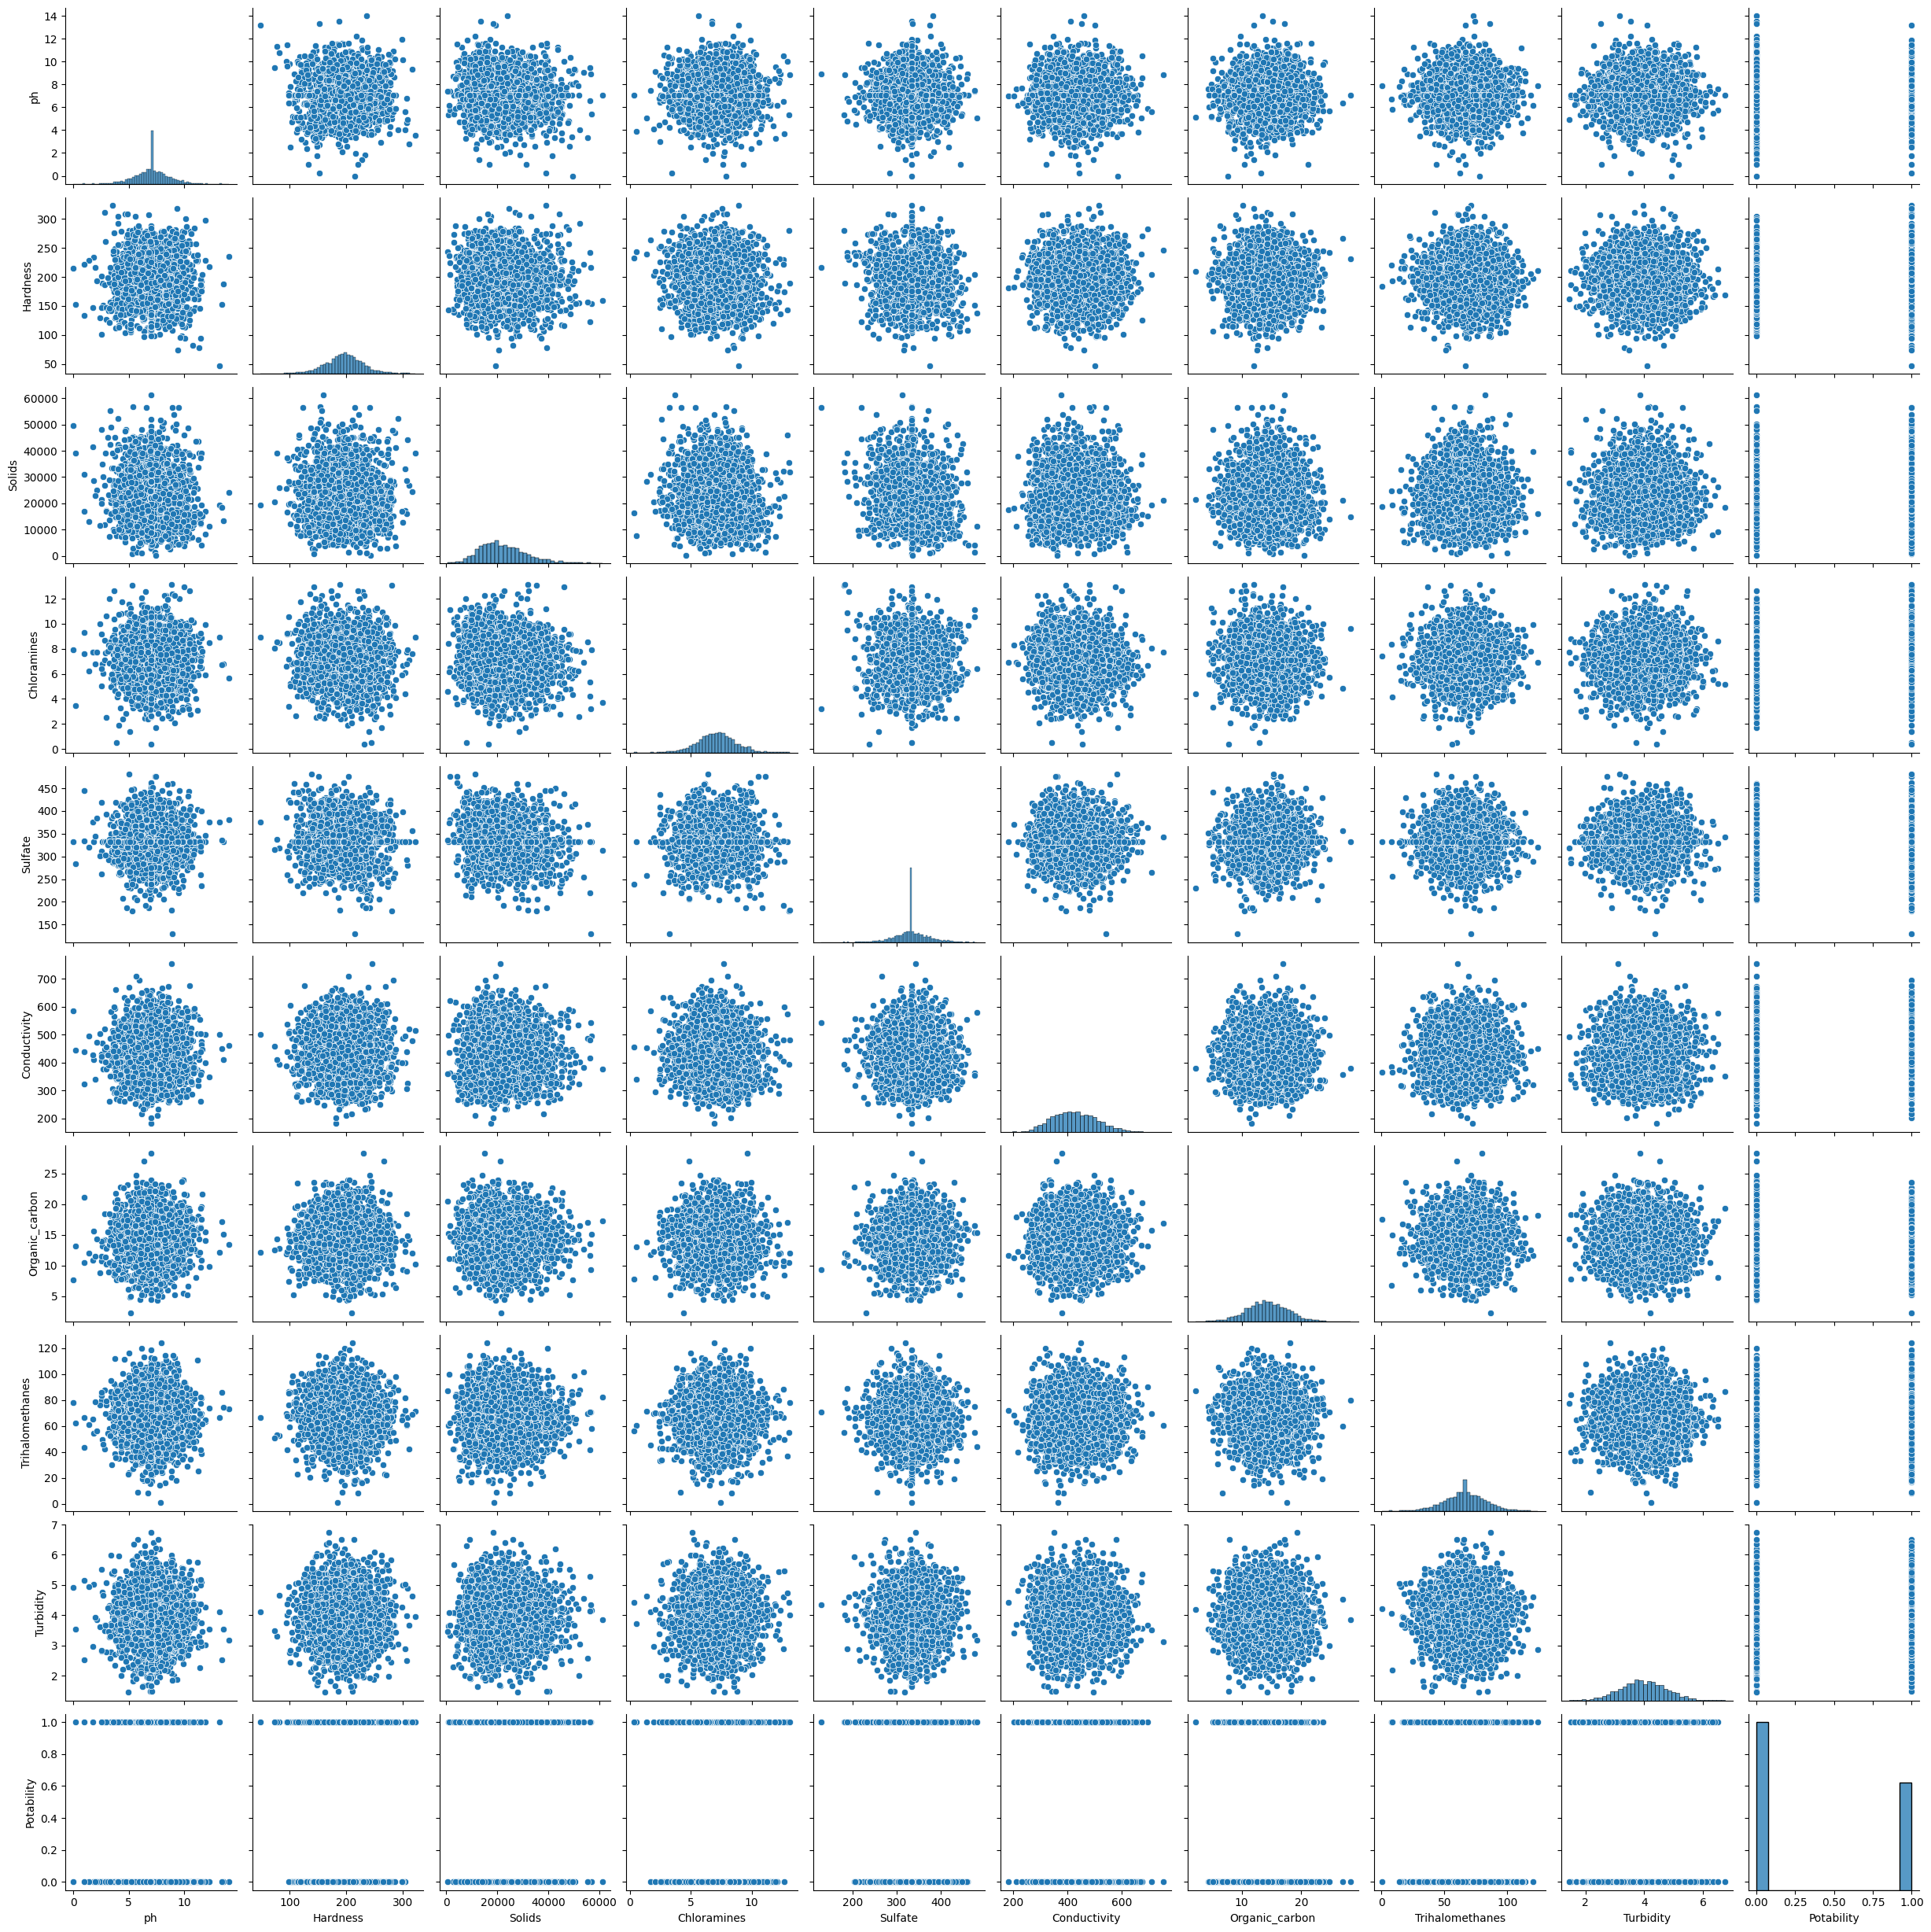

In [10]:
sns.pairplot(df);

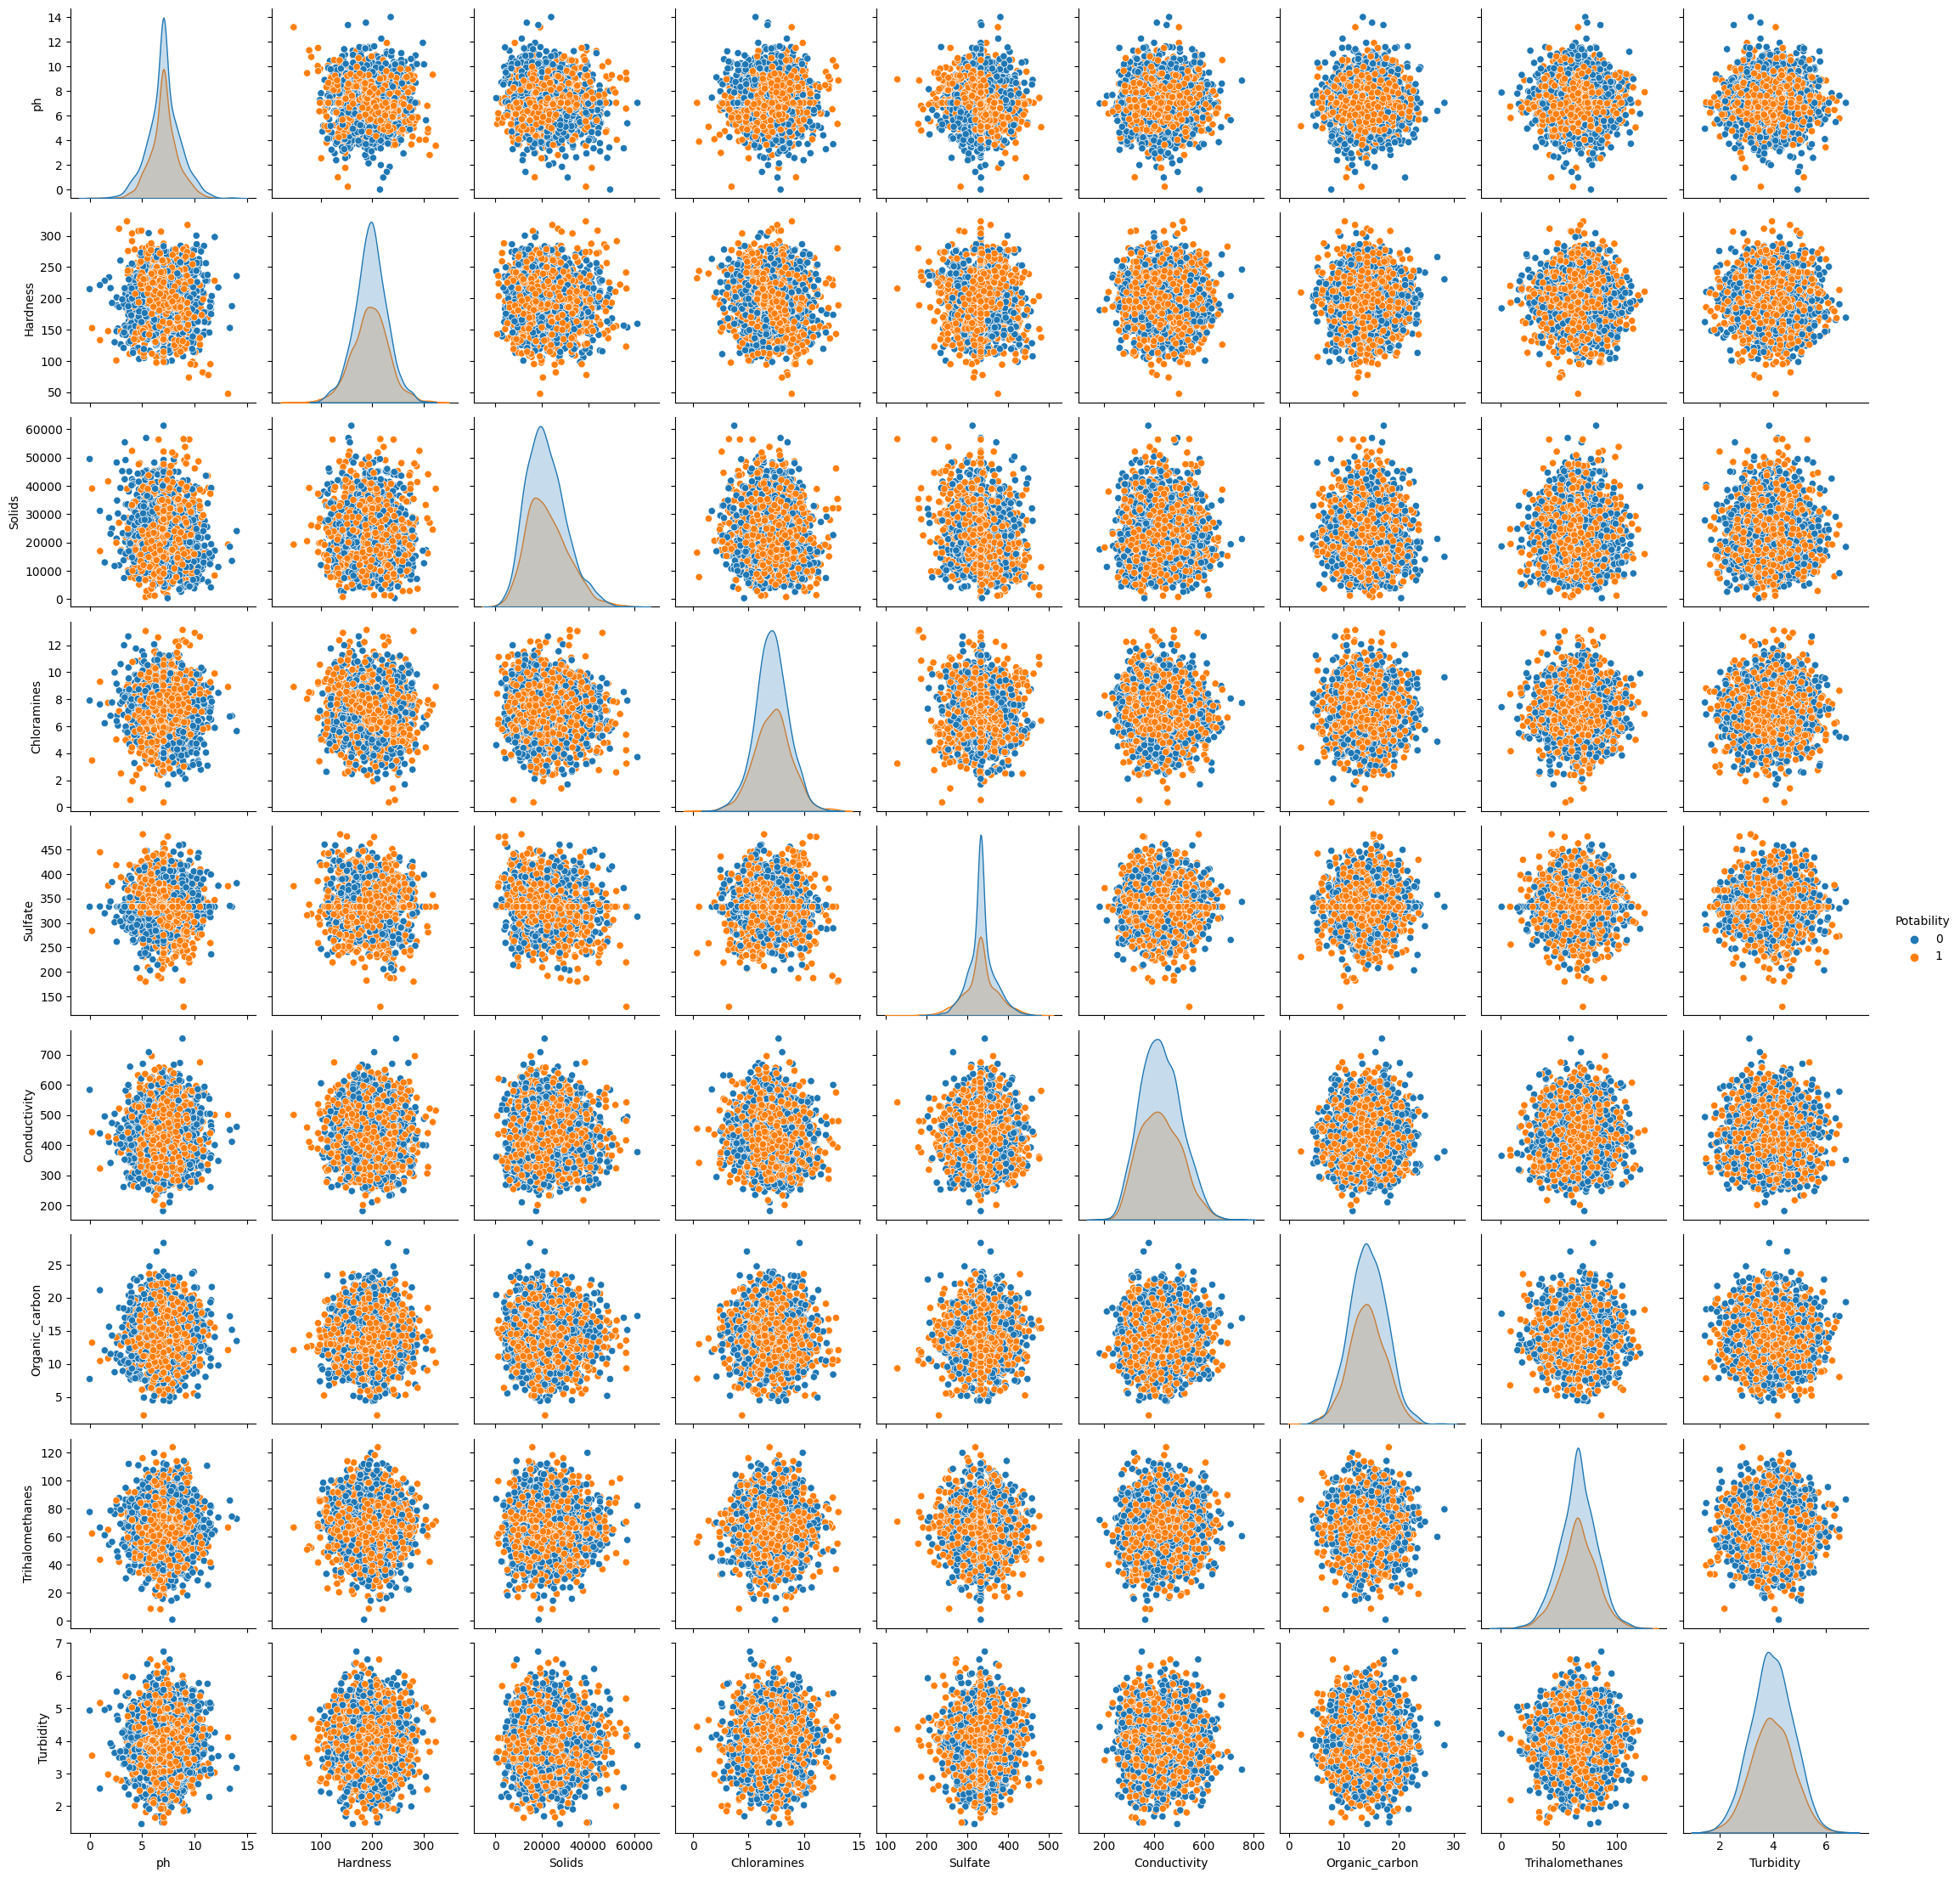

In [11]:
sns.pairplot(df, hue = 'Potability');

## **Histogram Charts for Numerical Variables** 

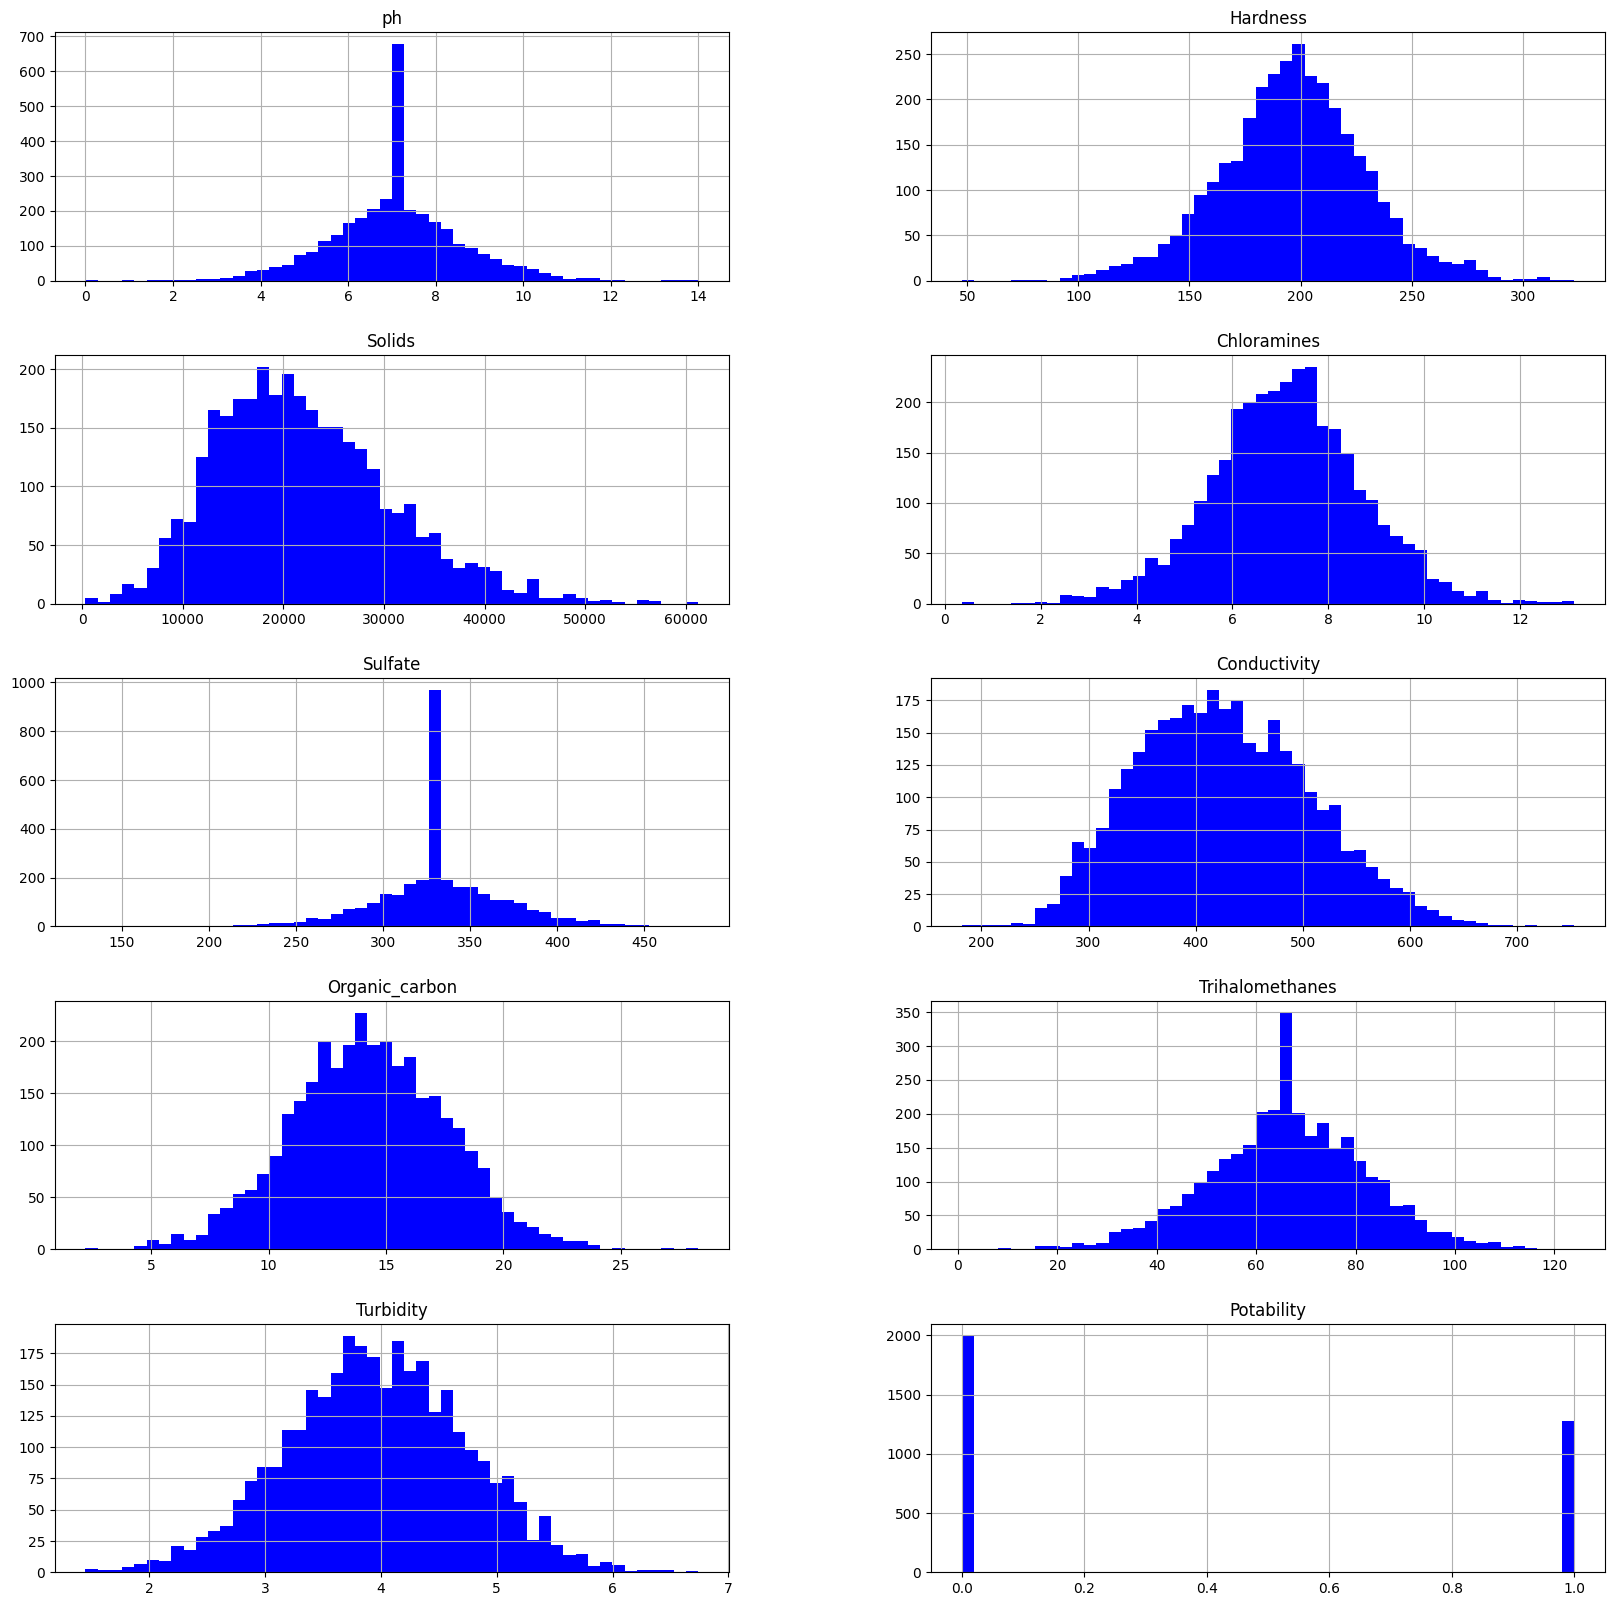

In [12]:
df.hist(figsize = (20,20), bins=50, color="blue", layout=(5,2));

## **Box Plots** 

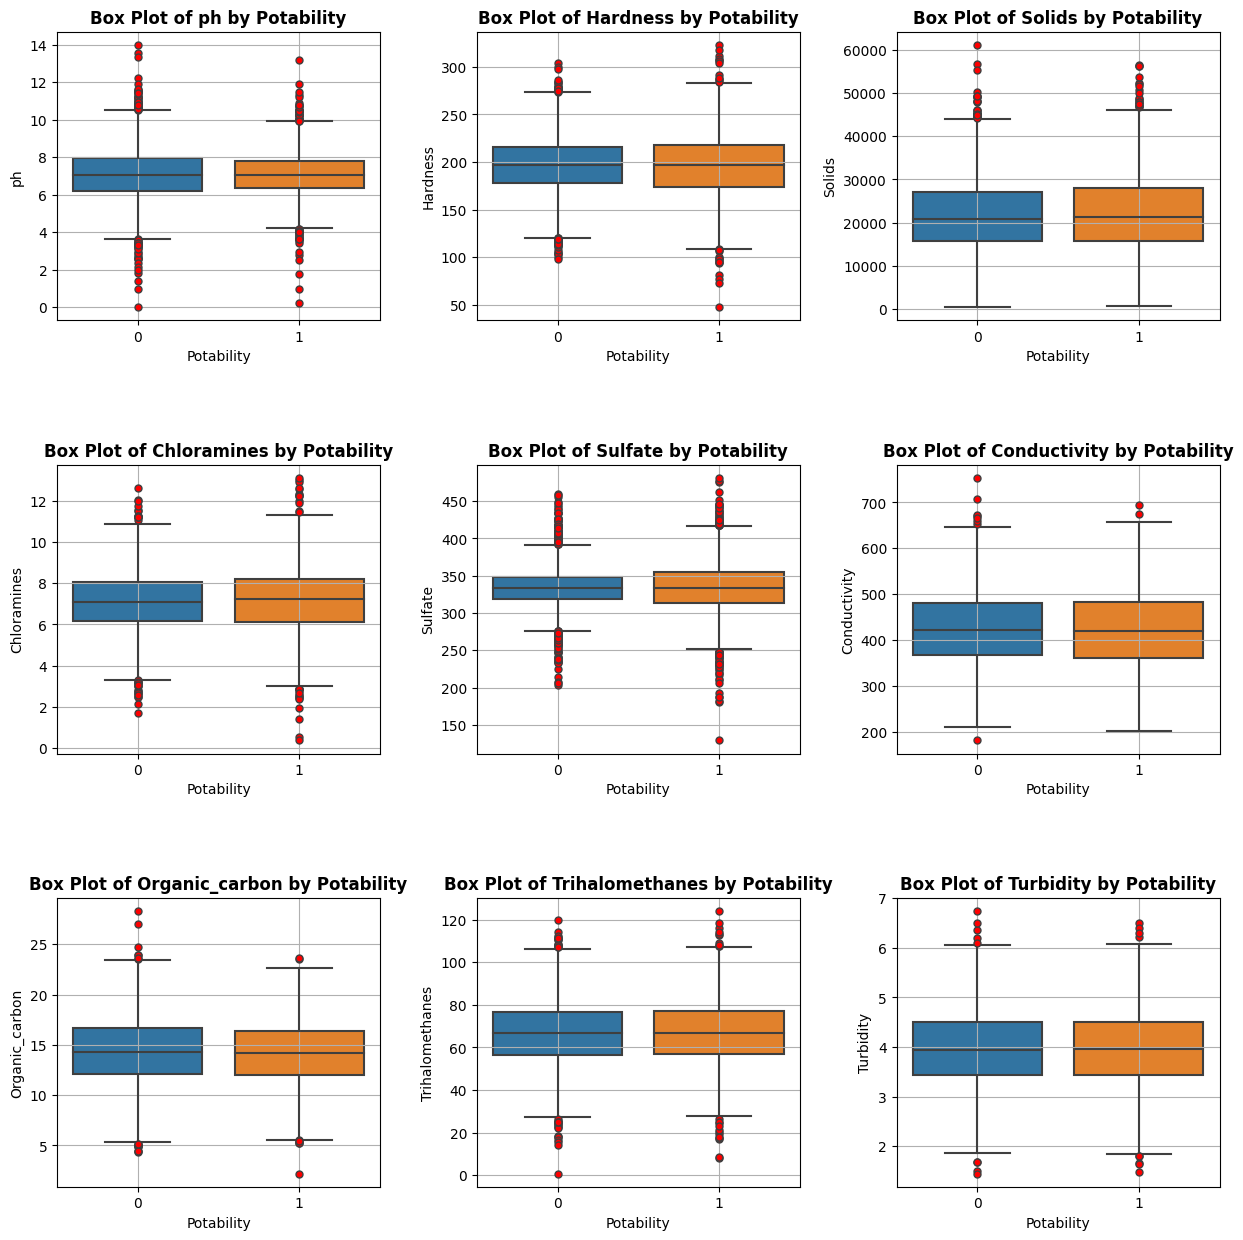

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(df.columns[:-1]): #potability column except 
    row = i // 3
    col_idx = i % 3
    
    sns.boxplot(data=df, x='Potability', y=col, ax=ax[row, col_idx], 
                flierprops=dict(markerfacecolor='red', marker='o'))
    ax[row, col_idx].set_title(f'Box Plot of {col} by Potability', fontweight='bold')
    ax[row, col_idx].grid(True)

plt.show()


##  **Correlation Between Numerical Variables**

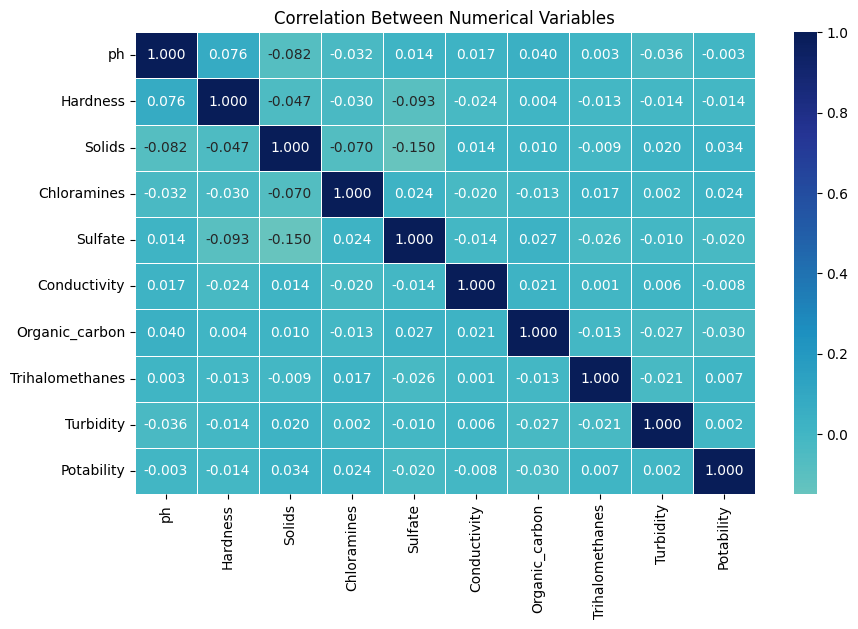

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', center=0, linewidths=0.5, linecolor='white', fmt='.3f')
plt.title('Correlation Between Numerical Variables')
plt.show()

## **Relationship of Numerical Variables with Potability** 

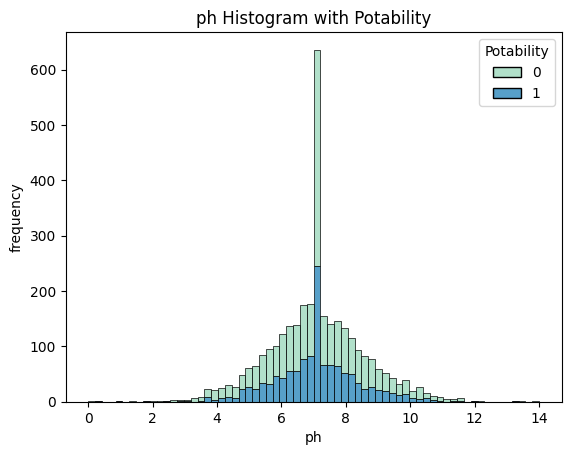

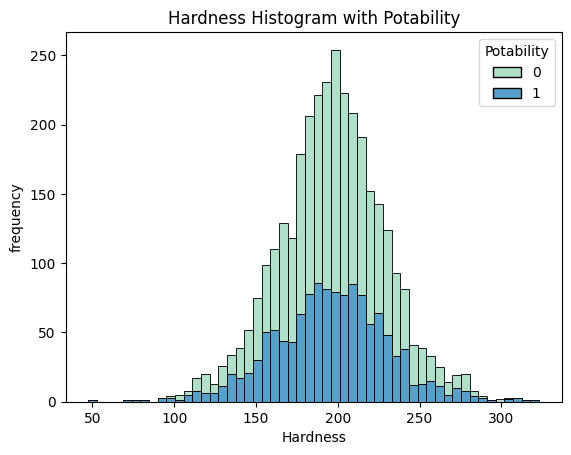

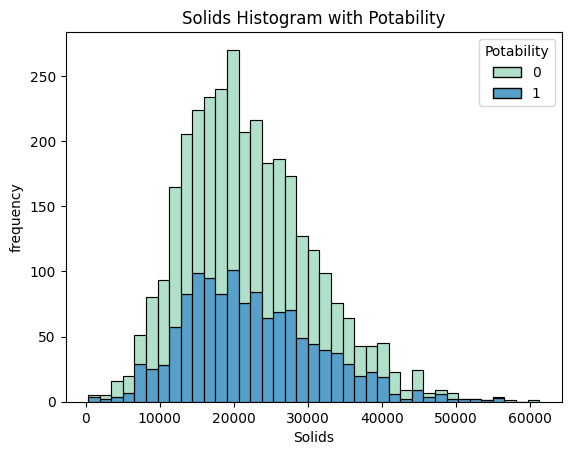

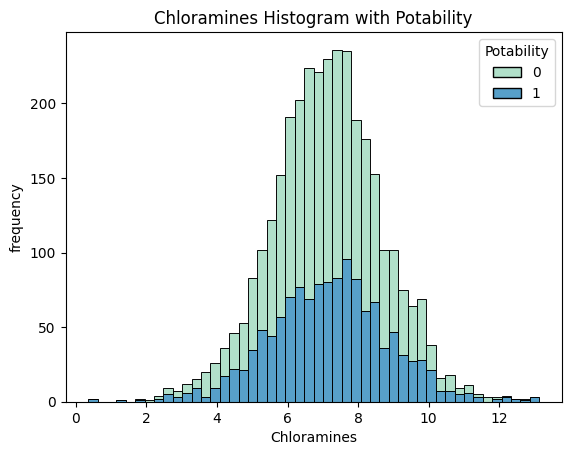

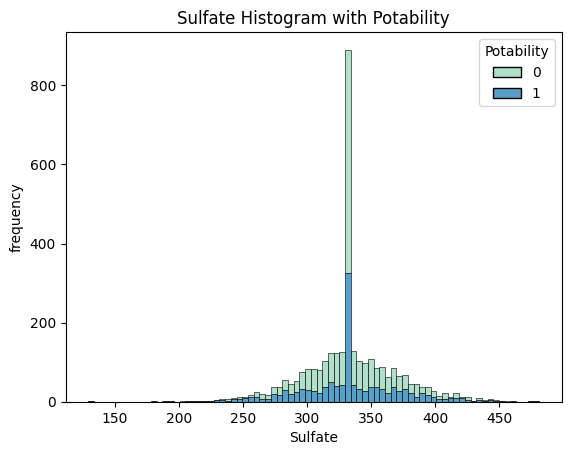

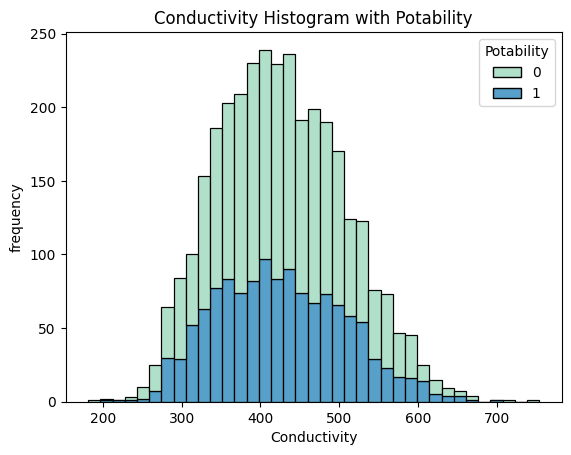

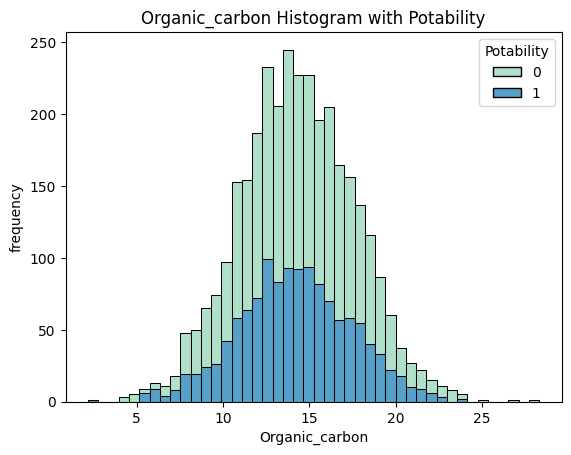

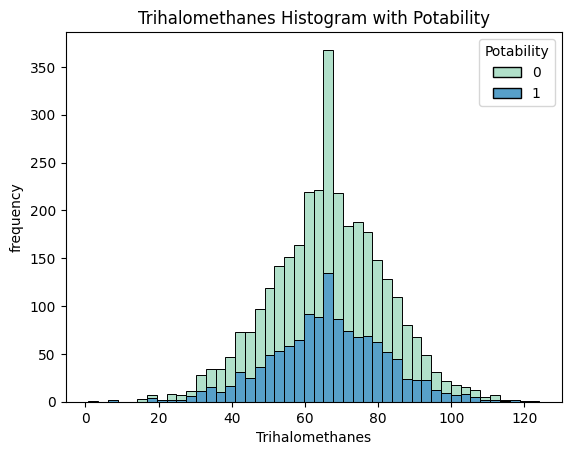

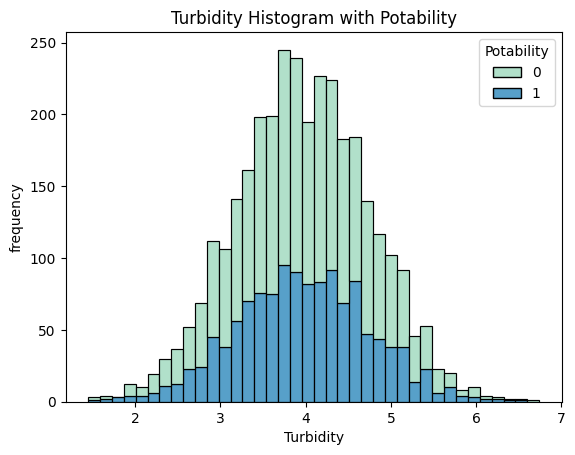

In [15]:
for num_row in df.columns[:-1]:
    sns.histplot(data=df,x=num_row,hue='Potability', multiple="stack",palette="YlGnBu",)
    plt.title(f"{num_row} Histogram with Potability")
    plt.xlabel(f"{num_row}")
    plt.ylabel("frequency")
    plt.show()

# **Preprocessing**

In [16]:
x = df.drop('Potability', axis=1).values
y = df['Potability'].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [18]:
x_train.shape ,x_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

## **Scaling** 

***Scaling the values between 1 and 0 will speed up the model training process, so we used MinMaxScaler().***

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

***After the scaling***

In [20]:
x_train

array([[0.47311525, 0.51891596, 0.27171856, ..., 0.48238685, 0.49079027,
        0.27120552],
       [0.47747855, 0.4821049 , 0.55255029, ..., 0.18584249, 0.50493346,
        0.4838104 ],
       [0.48829   , 0.52948183, 0.29079386, ..., 0.39439087, 0.53994235,
        0.65950789],
       ...,
       [0.47359742, 0.45374375, 0.49935618, ..., 0.39467646, 0.67841861,
        0.38087663],
       [0.62736912, 0.57901528, 0.2554584 , ..., 0.50077611, 0.3360708 ,
        0.53021533],
       [0.47843956, 0.49991248, 0.56112371, ..., 0.32617631, 0.50461516,
        0.4318777 ]])

# **Model Building**

In [21]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **EarlyStopping**

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.5325 - loss: 0.8721 - val_accuracy: 0.6280 - val_loss: 0.6644
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5371 - loss: 0.7924 - val_accuracy: 0.6280 - val_loss: 0.6625
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5265 - loss: 0.7562 - val_accuracy: 0.6280 - val_loss: 0.6634
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5549 - loss: 0.7264 - val_accuracy: 0.6280 - val_loss: 0.6623
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 0.7016 - val_accuracy: 0.6280 - val_loss: 0.6632
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 0.7069 - val_accuracy: 0.6280 - val_loss: 0.6624
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 0.7051 - val_accuracy: 0.6265 - val_loss: 0.6602
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - loss: 0.6904 - val_accuracy: 0.6235 -

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 206,533 (806.77 KB)

 Trainable params: 68,385 (267.13 KB)

 Non-trainable params: 1,376 (5.38 KB)

 Optimizer params: 136,772 (534.27 KB)

# **Results of the Model**

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6961 - loss: 0.5835 
Test Accuracy: 0.6860


## **Visualization of the Model's Results**

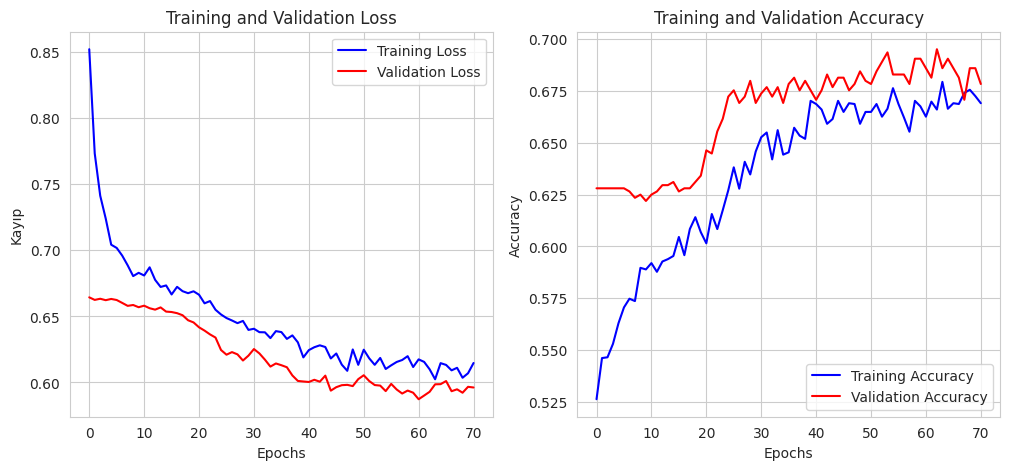

In [25]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Training Loss', color='b')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Training Accuracy', color='b')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

## **Confusion Matrix** 

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


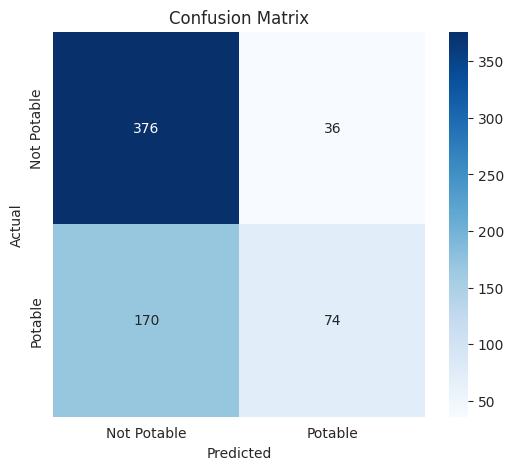

In [26]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Classification Report** 

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       412
           1       0.67      0.30      0.42       244

    accuracy                           0.69       656
   macro avg       0.68      0.61      0.60       656
weighted avg       0.68      0.69      0.65       656



## **ROC Curve** 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


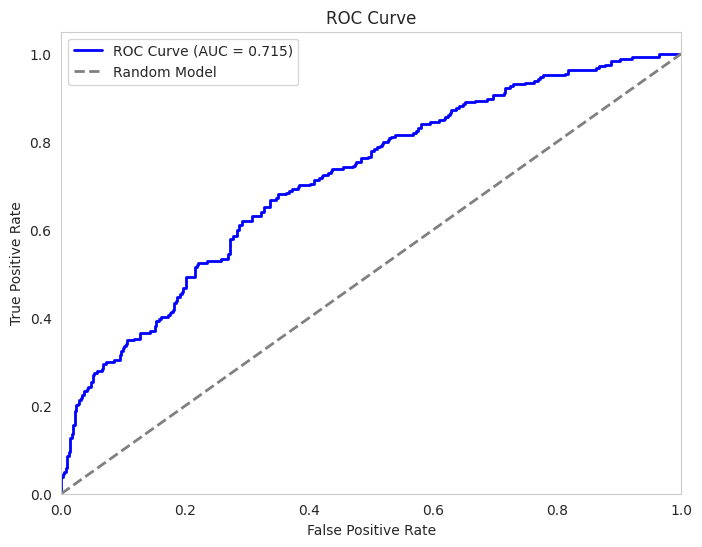

In [28]:
y_probs = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random Model')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()